In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head(20)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4


In [44]:
df2 = pd.read_csv('./survey_results_schema.csv')
df2.head(61)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [45]:

list(df2[df2.Column == 'MainBranch']['QuestionText'])

['Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."']

In [46]:
df['MainBranch'].unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

In [47]:
df2 = pd.read_csv('./survey_results_schema.csv')
list(df2[df2.Column == 'Hobbyist']['QuestionText'])

['Do you code as a hobby?']

In [48]:
df['Country'].unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic',
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Kyrgyzstan', 'Iran', 'Croatia', 'Egypt', 'Argentina',
       'Ghana', 'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guat

In [49]:
df[(df['Country']=='Germany') & (df['Gender']=='Woman')].count()

Respondent            190
MainBranch            189
Hobbyist              190
Age                   177
Age1stCode            189
                     ... 
WebframeWorkedWith    128
WelcomeChange         185
WorkWeekHrs           143
YearsCode             185
YearsCodePro          147
Length: 61, dtype: int64

In [50]:
df[(df['Country']=='Germany') & (df['Gender']=='Man')].count()

Respondent            3107
MainBranch            3102
Hobbyist              3107
Age                   2835
Age1stCode            3093
                      ... 
WebframeWorkedWith    2135
WelcomeChange         2974
WorkWeekHrs           2353
YearsCode             3085
YearsCodePro          2468
Length: 61, dtype: int64

In [81]:
df_Germany_Woman = df[(df['Country']=='Germany')&(df['Gender']=='Woman')]['Respondent'].count()
df_Germany_Man = df[(df['Country']=='Germany')&(df['Gender']=='Man')]['Respondent'].count()
df_Germany_notManWoman = df[(df['Country']=='Germany')&(df['Gender']!=('Man' or 'Woman'))]['Respondent'].count()


print('Number of men that took part in the survey in Germany')
print(df_Germany_Man)
print('Number of women that took part in the survey in Germany')
print(df_Germany_Woman)
print('Number of people that took part in the survey in Germany and did not identify themselves as Man or Woman or did not fill in the Gender field')
print(df_Germany_notManWoman)
#plot = df.plot.pie(y='', figsize=(5, 5))

Number of men that took part in the survey in Germany
3107
Number of women that took part in the survey in Germany
190
Number of people that took part in the survey in Germany and did not identify themselves as Man or Woman or did not fill in the Gender field
783


In [79]:
df['Gender'][df['Country']=='Germany'].unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

https://international.eco.de/women-in-tech-a-good-practice-guide-for-companies/#:~:text=In%20Germany%2C%20just%2016.8%25%20of,are%20as%20many%20as%20five.

In [36]:
df['Age'][df['Country']=='Germany'].value_counts()

29.0    169
30.0    163
25.0    156
32.0    154
31.0    148
28.0    141
24.0    137
27.0    132
22.0    127
23.0    121
26.0    120
35.0    119
33.0    116
21.0    113
34.0    110
38.0     92
36.0     89
20.0     82
40.0     73
37.0     68
39.0     64
19.0     60
18.0     49
41.0     46
42.0     44
17.0     39
43.0     33
46.0     30
45.0     30
47.0     26
16.0     25
49.0     22
15.0     21
50.0     20
48.0     20
52.0     18
44.0     17
53.0     15
51.0     11
54.0      9
57.0      8
55.0      8
61.0      7
56.0      6
58.0      6
60.0      4
63.0      3
64.0      3
14.0      3
59.0      2
65.0      1
62.0      1
69.0      1
12.0      1
31.5      1
78.0      1
71.0      1
Name: Age, dtype: int64

In [10]:
df['UndergradMajor'].unique()

array(['Computer science, computer engineering, or software engineering',
       nan, 'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'Information systems, information technology, or system administration',
       'Web development or web design',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)'],
      dtype=object)

In [11]:
df['UndergradMajor'].value_counts()/len(df['UndergradMajor'])*100

Computer science, computer engineering, or software engineering                   48.993965
Another engineering discipline (such as civil, electrical, mechanical, etc.)       7.375002
Information systems, information technology, or system administration              6.315447
A natural science (such as biology, chemistry, physics, etc.)                      3.420673
Mathematics or statistics                                                          2.868401
Web development or web design                                                      2.775322
A business discipline (such as accounting, finance, marketing, etc.)               2.133073
A humanities discipline (such as literature, history, philosophy, etc.)            1.562185
A social science (such as anthropology, psychology, political science, etc.)       1.447387
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.124711
I never declared a major                                                        

In [53]:
df[df['Gender']=='Man']['UndergradMajor'].value_counts()/len(df[df['Gender']=='Man']['UndergradMajor'])*100

Computer science, computer engineering, or software engineering                   54.784517
Another engineering discipline (such as civil, electrical, mechanical, etc.)       8.332428
Information systems, information technology, or system administration              6.854585
A natural science (such as biology, chemistry, physics, etc.)                      3.718514
Mathematics or statistics                                                          3.099124
Web development or web design                                                      2.749223
A business discipline (such as accounting, finance, marketing, etc.)               2.318910
A humanities discipline (such as literature, history, philosophy, etc.)            1.475670
A social science (such as anthropology, psychology, political science, etc.)       1.377871
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.077956
I never declared a major                                                        

In [40]:
df[(df['Gender']=='Woman') & (df['Country']=='Germany')]['EdLevel'].value_counts()/len(df[(df['Gender']=='Woman')& (df['Country']=='Germany')]['EdLevel'])*100

Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       36.842105
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          28.421053
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    13.157895
Some college/university study without earning a degree                                 8.421053
Other doctoral degree (Ph.D., Ed.D., etc.)                                             4.736842
Associate degree (A.A., A.S., etc.)                                                    2.631579
Professional degree (JD, MD, etc.)                                                     1.578947
Name: EdLevel, dtype: float64

In [41]:
df[(df['Gender']=='Man') & (df['Country']=='Germany')]['EdLevel'].value_counts()/len(df[(df['Gender']=='Man')& (df['Country']=='Germany')]['EdLevel'])*100

Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       30.576118
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          27.261023
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    17.315739
Some college/university study without earning a degree                                11.168330
Other doctoral degree (Ph.D., Ed.D., etc.)                                             4.795623
Associate degree (A.A., A.S., etc.)                                                    2.639202
Professional degree (JD, MD, etc.)                                                     1.319601
Primary/elementary school                                                              0.836820
I never completed any formal education                                                 0.225298
Name: EdLevel, dtype: float64

<AxesSubplot:xlabel='EdLevel', ylabel='count'>

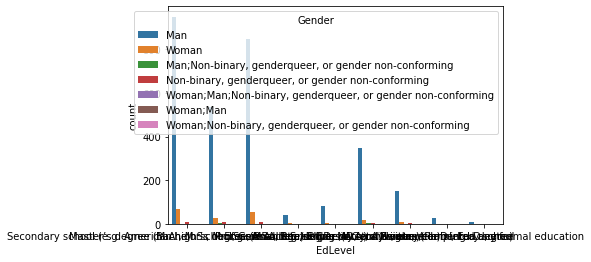

In [58]:
#sns.countplot(x="EdLevel", data=df[df['Country']=='Germany'], hue='Gender')
#sns.catplot(x="Edlevel", kind="count", palette="ch:.25", data=df)

In [13]:
df[df['Gender']=='Woman']['UndergradMajor'].value_counts()/len(df[df['Gender']=='Woman']['UndergradMajor'])*100

Computer science, computer engineering, or software engineering                   46.826223
Information systems, information technology, or system administration              6.633715
A natural science (such as biology, chemistry, physics, etc.)                      6.035380
Another engineering discipline (such as civil, electrical, mechanical, etc.)       5.775234
A humanities discipline (such as literature, history, philosophy, etc.)            5.072841
A social science (such as anthropology, psychology, political science, etc.)       4.318418
Mathematics or statistics                                                          4.136316
Web development or web design                                                      3.277836
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     2.913632
A business discipline (such as accounting, finance, marketing, etc.)               2.497399
A health science (such as nursing, pharmacy, radiology, etc.)                   

In [14]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['UndergradMajor'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['UndergradMajor'])*100

Computer science, computer engineering, or software engineering                   52.462182
Another engineering discipline (such as civil, electrical, mechanical, etc.)       6.984229
A natural science (such as biology, chemistry, physics, etc.)                      5.214033
Information systems, information technology, or system administration              4.634696
Mathematics or statistics                                                          3.765690
A business discipline (such as accounting, finance, marketing, etc.)               1.673640
Web development or web design                                                      1.287416
A social science (such as anthropology, psychology, political science, etc.)       0.965562
I never declared a major                                                           0.804635
A humanities discipline (such as literature, history, philosophy, etc.)            0.772449
Fine arts or performing arts (such as graphic design, music, studio art, etc.)  

In [15]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['UndergradMajor'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['UndergradMajor'])*100

Computer science, computer engineering, or software engineering                   45.789474
A natural science (such as biology, chemistry, physics, etc.)                      7.894737
Another engineering discipline (such as civil, electrical, mechanical, etc.)       5.789474
Information systems, information technology, or system administration              4.736842
A humanities discipline (such as literature, history, philosophy, etc.)            4.210526
Mathematics or statistics                                                          3.684211
A social science (such as anthropology, psychology, political science, etc.)       3.157895
A business discipline (such as accounting, finance, marketing, etc.)               2.631579
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.578947
Web development or web design                                                      1.052632
I never declared a major                                                        

In [16]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['Hobbyist'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['Hobbyist'])*100

Yes    66.315789
No     33.684211
Name: Hobbyist, dtype: float64

In [17]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['Hobbyist'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['Hobbyist'])*100

Yes    85.420019
No     14.579981
Name: Hobbyist, dtype: float64

In [18]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['Age1stCode'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['Age1stCode'])*100

16                      11.578947
15                       8.421053
12                       8.421053
14                       7.894737
18                       6.842105
17                       6.842105
13                       6.315789
20                       6.315789
19                       5.263158
11                       3.157895
21                       3.157895
10                       3.157895
25                       3.157895
26                       2.631579
9                        2.631579
30                       2.105263
22                       2.105263
23                       2.105263
8                        1.578947
28                       1.052632
7                        1.052632
6                        0.526316
33                       0.526316
32                       0.526316
24                       0.526316
Younger than 5 years     0.526316
29                       0.526316
34                       0.526316
Name: Age1stCode, dtype: float64

In [19]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['Age1stCode'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['Age1stCode'])*100

14                      14.998391
12                      14.000644
15                      10.943032
13                      10.041841
16                       8.915352
10                       7.048600
11                       6.018668
17                       5.310589
18                       4.023173
9                        2.832314
8                        2.800129
20                       2.446089
19                       2.252977
7                        1.770196
22                       0.997747
6                        0.901191
21                       0.836820
25                       0.675893
23                       0.482781
24                       0.386225
28                       0.354039
5                        0.225298
32                       0.193112
Younger than 5 years     0.193112
30                       0.193112
27                       0.160927
26                       0.160927
29                       0.096556
33                       0.064371
46            

In [20]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['WorkWeekHrs'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['WorkWeekHrs'])*100

40.0    46.842105
30.0     4.210526
38.0     4.210526
45.0     3.157895
35.0     2.631579
32.0     2.631579
60.0     1.578947
44.0     1.052632
50.0     1.052632
20.0     1.052632
18.0     1.052632
7.0      0.526316
47.0     0.526316
43.0     0.526316
9.0      0.526316
36.0     0.526316
42.0     0.526316
39.0     0.526316
25.0     0.526316
37.0     0.526316
19.0     0.526316
14.0     0.526316
Name: WorkWeekHrs, dtype: float64

In [21]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['WorkWeekHrs'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['WorkWeekHrs'])*100

40.00     43.289347
45.00      4.473769
35.00      3.636949
38.00      2.993241
50.00      2.961056
42.00      2.542646
30.00      1.802382
39.00      1.705826
20.00      1.416157
32.00      1.319601
43.00      1.029932
37.00      0.836820
60.00      0.708079
41.00      0.643708
55.00      0.611522
8.00       0.611522
44.00      0.514966
36.00      0.482781
16.00      0.354039
25.00      0.321854
24.00      0.257483
5.00       0.193112
15.00      0.193112
48.00      0.193112
9.00       0.193112
10.00      0.193112
34.00      0.160927
375.00     0.160927
12.00      0.128742
28.00      0.128742
70.00      0.128742
80.00      0.096556
19.00      0.096556
7.00       0.096556
31.00      0.096556
6.00       0.096556
13.00      0.096556
46.00      0.064371
49.00      0.064371
100.00     0.064371
37.50      0.064371
52.00      0.064371
23.00      0.064371
160.00     0.064371
38.75      0.032185
47.00      0.032185
385.00     0.032185
387.00     0.032185
90.00      0.032185
39.50      0.032185


In [22]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['JobFactors'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['JobFactors'])*100

Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture              6.437078
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options                                5.728999
Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development    3.830061
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Opportunities for professional development         3.315095
Flex time or a flexible schedule;Remote work options;Office environment or company culture                                                            3.154168
                                                                                                                                                        ...   
Diversity of the company or organization;Flex 

In [82]:
df_satisfaction =df['Job'].str.split('; ')
df_satisfaction = df.assign(method=df_cousin).explode('method')

,method,count
0,"Flex time or a flexible schedule;Languages, fr...",2485
1,"Languages, frameworks, and other technologies ...",2273
2,"Flex time or a flexible schedule;Languages, fr...",2195
3,"Flex time or a flexible schedule;Languages, fr...",1476
4,Flex time or a flexible schedule;Office enviro...,1388


In [23]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['JobFactors'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['JobFactors'])*100

Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development                                               4.736842
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options                                          4.210526
Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development              4.210526
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture                        3.684211
Flex time or a flexible schedule;Remote work options;Office environment or company culture                                                                      3.684211
                                                                                                                                                           

In [24]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['JobSat'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['JobSat'])*100

Very satisfied                        27.035726
Slightly satisfied                    24.525266
Slightly dissatisfied                 12.713228
Neither satisfied nor dissatisfied     8.722240
Very dissatisfied                      5.246218
Name: JobSat, dtype: float64

In [25]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['JobSat'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['JobSat'])*100

Very satisfied                        25.789474
Slightly satisfied                    20.526316
Slightly dissatisfied                 14.736842
Neither satisfied nor dissatisfied    10.000000
Very dissatisfied                      5.789474
Name: JobSat, dtype: float64

In [28]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['NEWOvertime'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['NEWOvertime'])*100

Sometimes: 1-2 days per month but less than weekly          23.237850
Often: 1-2 days per week or more                            20.437721
Occasionally: 1-2 days per quarter but less than monthly    14.290312
Rarely: 1-2 days per year or less                           10.588993
Never                                                        9.076279
Name: NEWOvertime, dtype: float64

In [29]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['NEWOvertime'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['NEWOvertime'])*100

Often: 1-2 days per week or more                            24.210526
Sometimes: 1-2 days per month but less than weekly          18.947368
Occasionally: 1-2 days per quarter but less than monthly    14.210526
Never                                                       10.000000
Rarely: 1-2 days per year or less                            8.947368
Name: NEWOvertime, dtype: float64

In [26]:
df[(df['Gender']=='Man')&(df['Country']=='Germany')]['NEWEdImpt'].value_counts()/len(df[(df['Gender']=='Man')&(df['Country']=='Germany')]['NEWEdImpt'])*100

Fairly important                      22.497586
Somewhat important                    20.212424
Very important                        19.761828
Not at all important/not necessary    12.294818
Critically important                   6.984229
Name: NEWEdImpt, dtype: float64

In [27]:
df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['NEWEdImpt'].value_counts()/len(df[(df['Gender']=='Woman')&(df['Country']=='Germany')]['NEWEdImpt'])*100

Somewhat important                    22.631579
Very important                        19.473684
Fairly important                      17.894737
Not at all important/not necessary    14.210526
Critically important                   7.894737
Name: NEWEdImpt, dtype: float64